In [1]:
# project: p3
# submitter: byu69
# partner: none
# hours: 10

In [42]:
from IPython.display import display, HTML,Image
from graphviz import Digraph
from collections import deque
import scrape
import time

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
driver = webdriver.Chrome(options=options, service=service)

# ws = scrape.WebSearcher(driver)

In [43]:
url= "http://34.71.246.126:5000"
driver.get(url)


In [44]:
print(driver.page_source)

<html><head>
    <link href="https://fonts.googleapis.com/css2?family=VT323&amp;display=swap" rel="stylesheet">
    <link rel="stylesheet" href="styles.css">
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      $(document).ready(function() {
        window.customData = {}
        window.customData.rootURL = window.location.href
        const passwordInput = $('#password');
        const attemptButton = $('#attempt-button');
        const passwordCheckURL = `${window.customData.rootURL}password`

        const tryPassword = () => {
          const data = passwordInput.val()
          $.post({
            type: "POST",
            url: passwordCheckURL,
            data: data,
            contentType: "application/text; charset=utf-8",
            dataType: "json"
          }).then((resp) => {
            if(resp !== 'NO'){
              newURL = window.customData.rootURL + resp
              window.location.href = newURL
            }
          });
    

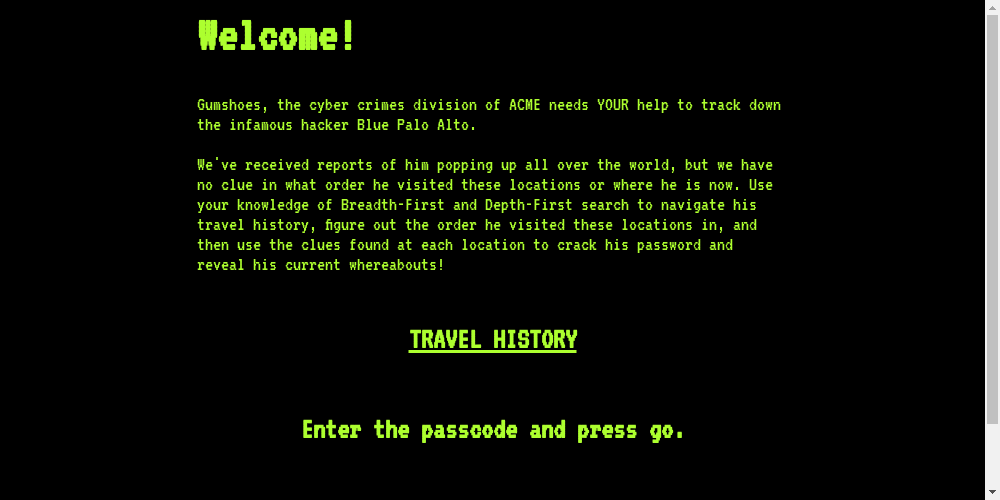

In [45]:
def show_screen():
    driver.set_window_size(1000,500)
    driver.save_screenshot("temp.png")
    display(Image("temp.png"))
show_screen()

In [40]:
text = driver

TypeError: visit_and_get_children() takes 0 positional arguments but 1 was given

In [3]:
# # lab6 provided: https://github.com/cs320-wisc/f22/tree/main/labs/dfs-vs-bfs
# class test_graph:
#     def __init__(self):
#         self.nodes = {}
#         self.traverse_order = None # in what order were nodes checked?
#         self.next_guess = 0
#         self.colors = {}

#     def node(self, name):
#         name = str(name).upper()
#         self.nodes[name] = Node(self, name)

#     def edge(self, src, dst):
#         src, dst = str(src).upper(), str(dst).upper()
#         for name in [src, dst]:
#             if not name in self.nodes:
#                 self.node(name)
#         self.nodes[src].children.append(self.nodes[dst])

#     def _repr_svg_(self):
#         g = Digraph(engine='neato')
#         for n in self.nodes:
#             g.node(n, fillcolor=self.colors.get(n, "white"), style="filled")
#             children = self.nodes[n].children
#             for i, child in enumerate(children):
#                 g.edge(n, child.name, penwidth=str(len(children) - i), len="1.5")
#         return g._repr_image_svg_xml()

#     def dfs(self, src, dst):
#         src, dst = str(src).upper(), str(dst).upper()
#         self.traverse_order = []
#         self.next_guess = 0
#         self.colors = {}
#         self.visited = set()
#         self.path = self.nodes[src].dfs(dst)
#         display(HTML("now call .visit(???) to identify the first node explored"))
#         display(self)

#     def bfs(self, src, dst):
#         src, dst = str(src).upper(), str(dst).upper()
#         self.traverse_order = []
#         self.next_guess = 0
#         self.colors = {}
#         self.path = self.nodes[src].bfs(dst)
#         display(HTML("now call .visit(???) to identify the first node explored"))
#         display(self)
    
#     def visit(self, name):
#         name = str(name).upper()
#         if self.traverse_order == None:
#             print("please call dfs or bfs first")
#         if self.next_guess == len(self.traverse_order):
#             print("no more nodes to explore")
#             return
#         self.colors = {}
#         for n in self.traverse_order[:self.next_guess]:
#             self.colors[n] = "yellow"
#         if name == self.traverse_order[self.next_guess]:
#             display(HTML("Correct..."))
#             self.colors[name] = "yellow"
#             self.next_guess += 1
#         else:
#             display(HTML("<b>Oops!</b> Please guess again."))
#             self.colors[name] = "red"
#         display(self)
#         if self.next_guess == len(self.traverse_order):
#             if self.path == None:
#                 display(HTML("You're done, there is no path!"))
#             else:
#                 seq = input("What path was found? [enter nodes, comma separated]: ")
#                 seq = tuple(map(str.strip, seq.upper().split(",")))
#                 if seq == tuple(map(str.upper, self.path)):
#                     print("Awesome!!!")
#                 else:
#                     print("actually, expected was: ", ",".join(self.path))

    
# class Node:
#     def __init__(self, graph, name):
#         self.graph = graph
#         self.name = name
#         self.children = []

#     def __repr__(self):
#         return "node %s" % self.name

#     def dfs(self, dst):
#         if self.name in self.graph.visited:
#             return None
        
#         self.graph.traverse_order.append(self.name)
        
#         self.graph.visited.add(self.name)

#         if self.name == dst:
#             return (self.name, )
#         for child in self.children:
#             childpath = child.dfs(dst)
#             if childpath:
#                 return (self.name, ) + childpath
#         return None

#     def backtrace(self):
#         nodes = []
#         node = self
#         while node != None:
#             nodes.append(node.name)
#             node = node.back
#         return tuple(reversed(nodes))

#     def bfs(self, dst):
#         added = set()
#         todo = [self]
#         self.back = None
#         added.add(self.name)

#         while len(todo) > 0:
#             curr = todo.pop(0)
#             self.graph.traverse_order.append(curr.name)

#             if curr.name == dst:
#                 return curr.backtrace()
#             else:
#                 for child in curr.children:
#                     if not child.name in added:
#                         todo.append(child)
#                         child.back = curr
#                         added.add(child.name)

#         return None